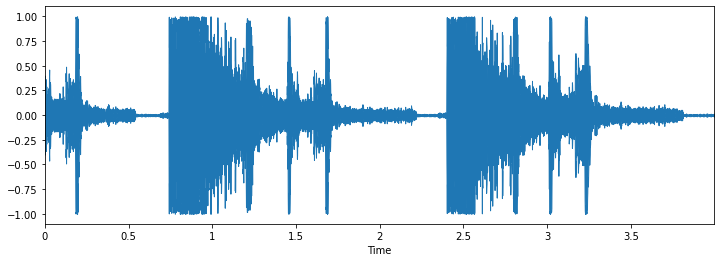

In [60]:
import librosa
import IPython.display as ipd
from scipy.io import wavfile
from scipy.io.wavfile import write
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt

filename = 'Evaluation audio/hasil_tembak/10 meter good/tembak1_10g.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [47]:
import sounddevice as sd
import librosa
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
import time

fs = 22050
duration = 4

recording = sd.rec(duration * fs, samplerate=fs, channels=1, dtype='float64').ravel()
sd.wait()
print("Capture Complete")

recsound = {'data': recording, 'rate': 22050}
recsound_mfccs = librosa.feature.mfcc(y=recsound['data'], sr=recsound['rate'], n_mfcc=40)

model = load_model('./saved_models/weights.best.basic_cnn.hdf5')
le = LabelEncoder()
le.classes_ = np.load('./saved_models/classes.npy')

num_rows = 40
num_columns = 174
num_channels = 1
max_pad_len = 174

sample = recsound

mfccs = librosa.feature.mfcc(y=sample['data'], sr=sample['rate'], n_mfcc=40)
pad_width = max_pad_len - mfccs.shape[1]
mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')

prediction_feature = mfccs
prediction_feature = prediction_feature.reshape(
        1, num_rows, num_columns, num_channels)

predicted_vector = np.argmax(model.predict(prediction_feature), axis=-1)
predicted_class = le.inverse_transform(predicted_vector)
print("The predicted class is:", predicted_class[0], '\n')

predicted_proba_vector = model.predict(prediction_feature)
predicted_proba = predicted_proba_vector[0]
for i in range(len(predicted_proba)):
    category = le.inverse_transform(np.array([i]))
    print(category[0], "\t\t : ", format(predicted_proba[i], '.32f'))

start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))

Capture Complete
The predicted class is: suara_alam 

angin 		 :  0.03465656936168670654296875000000
gergaji 		 :  0.20902086794376373291015625000000
orang_berbicara 		 :  0.04119268432259559631347656250000
suara_alam 		 :  0.71509897708892822265625000000000
suara_tembakan 		 :  0.00003098411980317905545234680176
--- 0.0 seconds ---


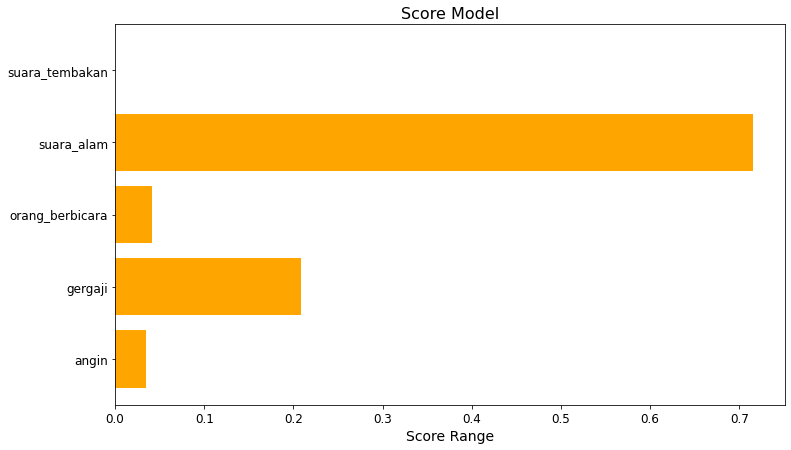

In [48]:
import matplotlib.pyplot as plt

sound_class = le.classes_.tolist()
predict_score = predicted_proba.tolist()

plt.figure(figsize=(12,7))
plt.barh(sound_class, predict_score, color='orange')

plt.title('Score Model', size=16)
plt.xlabel('Score Range', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

In [51]:
import pandas as pd
from datetime import datetime

now = datetime.now()
current_time = now.strftime("%H:%M:%S")

data = {
  "class": sound_class,
  current_time: predict_score
}

#load data into a DataFrame object:
df = pd.DataFrame(data)

print(df)

             class  09:08:29
0            angin  0.034657
1          gergaji  0.209021
2  orang_berbicara  0.041193
3       suara_alam  0.715099
4   suara_tembakan  0.000031


In [54]:
df.to_csv('./dataprediksi/hasil_prediksi.csv', index=False)

In [55]:
import pandas
from datetime import datetime

data = pandas.read_csv('./dataprediksi/hasil_prediksi.csv')
kolom= int(len(data.columns))

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
data.insert(kolom - (kolom-1), current_time, predict_score)

data.to_csv('./dataprediksi/hasil_prediksi.csv', index=False)

data.head()

,class,09:13:23,09:08:29
0,angin,0.034657,0.034657
1,gergaji,0.209021,0.209021
2,orang_berbicara,0.041193,0.041193
3,suara_alam,0.715099,0.715099
4,suara_tembakan,0.000031,0.000031


In [ ]:
import os
from azure.storage.blob import BlockBlobService

In [ ]:
root_path = '.'
dir_name = 'dataprediksi'
path = f"{root_path}/{dir_name}"
file_names = os.listdir(path)

account_name = 'hartastorage'
account_key = 'kAhYlJ/javru6QU/j/1/Yy3cxod5VktVsiEDIhAVA574/9ggK+LrrnVa4k/NWV+TxTk79YO72qRYy0y1cWfHHw=='
container_name = 'dataprediksi'

block_blob_service = BlockBlobService(
    account_name=account_name,
    account_key=account_key
)

for file_name in file_names:
    blob_name = f"{dir_name}/{file_name}"
    file_path = f"{path}/{file_name}"
    block_blob_service.create_blob_from_path(container_name, blob_name, file_path)

In [ ]:
from pathlib import Path
for p in Path('./dataset_forest/audio/fold10').glob("*-1-*-*.wav"):
    p.unlink()

for p in Path('./dataset_forest/audio/fold10').glob("*-3-*-*.wav"):
    p.unlink()

for p in Path('./dataset_forest/audio/fold10').glob("*-5-*-*.wav"):
    p.unlink()

for p in Path('./dataset_forest/audio/fold10').glob("*-7-*-*.wav"):
    p.unlink()

for p in Path('./dataset_forest/audio/fold10').glob("*-8-*-*.wav"):
    p.unlink()

In [1]:
input()

'1'